In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loandata.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.drop('Loan_ID',axis=1,inplace=True)

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

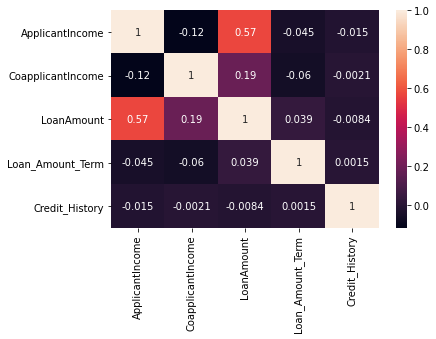

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])

In [11]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [12]:
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_cat:
    le = LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [14]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [15]:
df = pd.concat([df_num,df_cat],axis=1)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,2,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1


In [16]:
df.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
LA = df['LoanAmount'].mean()
LAT = df['Loan_Amount_Term'].mean()
CH=df['Credit_History'].mean()

In [18]:
LA = df['LoanAmount'].fillna(LA,inplace=True)
LAT = df['Loan_Amount_Term'].fillna(LAT,inplace=True)
CH=df['Credit_History'].fillna(CH,inplace=True)

In [19]:
df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.838762,0.657980,0.842020,0.218241,0.237785,1.037459,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.421752,0.484971,1.120531,0.413389,0.534737,0.787482,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,1.000000


<AxesSubplot:>

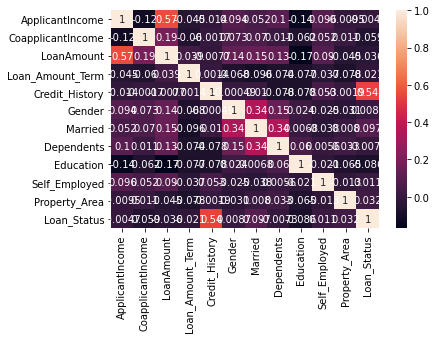

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,2
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,1,2
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,1,0,2
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,3,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,2
612,7583,0.0,187.000000,360.0,1.0,1,1,2,0,0,2


In [24]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

In [27]:

models=[('Logistic Regression',LogisticRegression()),
        ('Decision Tree',DecisionTreeClassifier()),
        ('Support Vector ',SVC()),
        ('Nearest Neighbors',KNeighborsClassifier()),
        ('Random Forest ',RandomForestClassifier()),
        ('AdaBoostClassifier',AdaBoostClassifier()),
        ('Gradient Boosting',GradientBoostingClassifier()),
        ('Xtreame Gradient Boosting',XGBClassifier())
    
]

In [28]:
accuracy=[]

for name,model in models:
    
    print(name,'  :--  ')
    print()
    model.fit(xtrain,ytrain)
    print()
    ypred=model.predict(xtest)
    print(confusion_matrix(ytest,ypred))
    print()

    print(classification_report(ytest,ypred))
    accuracy.append(accuracy_score(ytest,ypred))

Logistic Regression   :--  


[[ 23  28]
 [  3 131]]

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185

Decision Tree   :--  


[[ 23  28]
 [ 24 110]]

              precision    recall  f1-score   support

           0       0.49      0.45      0.47        51
           1       0.80      0.82      0.81       134

    accuracy                           0.72       185
   macro avg       0.64      0.64      0.64       185
weighted avg       0.71      0.72      0.72       185

Support Vector    :--  


[[  0  51]
 [  0 134]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      1.00      0.84       134

    accuracy                  

In [29]:
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
print(confusion_matrix(ytest,ypred))

print(classification_report(ytest,ypred))


[[ 23  28]
 [  3 131]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185



In [30]:
logreg.score(xtrain,ytrain)

0.7995337995337995

In [31]:
logreg.score(xtest,ytest)

0.8324324324324325